In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# now we read the dataset
df = pd.read_csv('weight_height.csv')

In [55]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [56]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [57]:
# we will convert the values in cms and kgs for better understanding
df['Height(Inches)'] = df['Height(Inches)'] * 2.54
df['Weight(Pounds)'] = df['Weight(Pounds)'] * 0.453592

In [58]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,167.089607,51.252494
1,2,181.648633,61.909547
2,3,176.272800,69.411778
3,4,173.270164,64.562199
4,5,172.181037,65.452010
...,...,...,...
24995,24996,176.535461,53.538008
24996,24997,163.952580,54.518674
24997,24998,164.334317,53.644285
24998,24999,171.524117,59.995797


In [59]:
df.columns = ['Sr. No','Height', 'Weight']

In [60]:
df

,Sr. No,Height,Weight
0,1,167.089607,51.252494
1,2,181.648633,61.909547
2,3,176.272800,69.411778
3,4,173.270164,64.562199
4,5,172.181037,65.452010
...,...,...,...
24995,24996,176.535461,53.538008
24996,24997,163.952580,54.518674
24997,24998,164.334317,53.644285
24998,24999,171.524117,59.995797


In [61]:
# convert data to integer for better consistency
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)

In [62]:
df

,Sr. No,Height,Weight
0,1,167,51
1,2,181,61
2,3,176,69
3,4,173,64
4,5,172,65
...,...,...,...
24995,24996,176,53
24996,24997,163,54
24997,24998,164,53
24998,24999,171,59


Text(0, 0.5, 'Height')

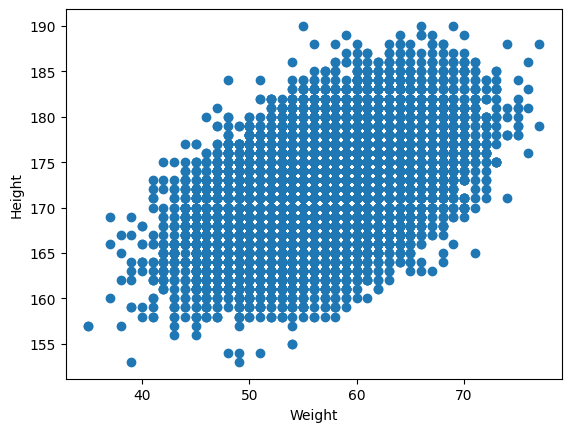

In [63]:
# now lets try to visualize the data
plt.scatter(x=df['Weight'], y= df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [64]:
# now lets check the entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sr. No  25000 non-null  int64
 1   Height  25000 non-null  int64
 2   Weight  25000 non-null  int64
dtypes: int64(3)
memory usage: 586.1 KB


In [65]:
# now lets check if there are any missing values or not
df.isnull().sum()

Sr. No    0
Height    0
Weight    0
dtype: int64

In [66]:
# as we can see there are no missing values so we can proceed further

In [67]:
# now lets divide our dataset into dependent and independent features
x = df[['Weight']] # input variable / independent feature
y = df[['Height']] # output variable / dependent feature

In [68]:
x.shape, y.shape

((25000, 1), (25000, 1))

In [69]:
# now we will use scikit-learn for our model training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [70]:
x_train.shape, x_test.shape

((20000, 1), (5000, 1))

In [71]:
y_train.shape, y_test.shape

((20000, 1), (5000, 1))

In [72]:
# now lets standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
x_train = scaler.fit_transform(x_train)

In [74]:
x_test = scaler.fit_transform(x_test)

In [75]:
# now lets train the model using scikit learn
from sklearn.linear_model import LinearRegression

In [76]:
regressor = LinearRegression()

In [77]:
regressor.fit(x_train, y_train)

LinearRegression()

In [78]:
regressor.intercept_

array([172.194])

In [79]:
regressor.coef_

array([[2.40823057]])

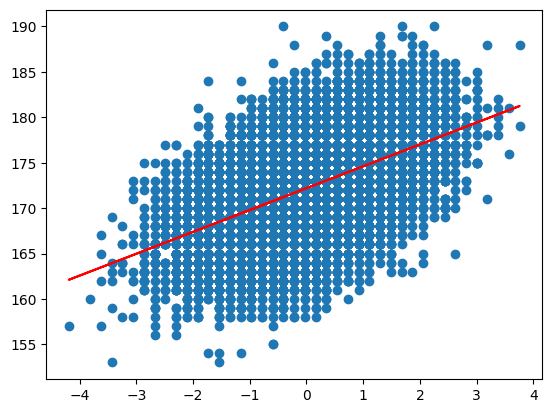

In [80]:
# now lets visualize the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), c = 'r')

In [81]:
y_pred_test = regressor.predict(x_test)

In [82]:
y_pred_test

array([[173.47809004],
       [168.9785104 ],
       [173.928048  ],
       ...,
       [175.27792189],
       [172.57817411],
       [173.928048  ]])

In [83]:
y_test

,Height
6868,173
24016,172
9668,171
13640,175
14018,175
...,...
8670,175
11839,170
4013,174
21147,170


In [84]:
# as we can see the values are very close
# so lets check for the error or accuracy so we will check the performance metrics

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

In [87]:
rmse = np.sqrt(mse)

In [88]:
print(mse)

17.69096518167294


In [89]:
print(mae)

3.3539486537553698


In [90]:
print(rmse)

4.206062907479266


In [91]:
# now lets check the accuracy

In [92]:
from sklearn.metrics import r2_score

In [93]:
score = r2_score(y_test, y_pred_test)
score

0.25776113347766083

In [94]:
Accuracy = score * 100
Accuracy

25.776113347766085

In [99]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [100]:
import statsmodels.api as sm

In [101]:
model = sm.OLS(y_train, x_train).fit()

In [102]:
prediction = model.predict(x_test)
print(prediction)

[ 1.28409004 -3.2154896   1.734048   ...  3.08392189  0.38417411
  1.734048  ]


In [103]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.909
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                      0.0480
Time:                        10:49:35   Log-Likelihood:                     -1.3136e+05
No. Observations:               20000   AIC:                                  2.627e+05
Df Residuals:                   19999   BIC:                                  2.627e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
predict = regressor.predict(scaler.tr